# RNL results graphs

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mutual_info_score

In [36]:
def plot_ranges(bins, y_values, xlabel, ylabel, title, bar_color):
    sns.set_style("darkgrid")
    plt.figure(figsize=(8,5))
    line_x = []
    line_y = []
    for b, v in zip(bins, y_values):
        plt.plot([max(b.left, 30), min(b.right, 120)], [v, v], lw=10, color=bar_color, solid_capstyle="butt", zorder=1)#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
        plt.scatter((max(b.left, 30) + min(b.right, 120))/2, v, zorder=2, color="red")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
        line_x.append((max(b.left, 30) + min(b.right, 120))/2)
        line_y.append(v)
    plt.plot(line_x, line_y, zorder=3, color="red")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
    plt.xticks(range(30, 120, 10), fontsize=14)
    plt.yticks(fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=20)
    plt.margins(0.1)
    plt.show()
    return line_x, line_y

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

# MIMIC

In [3]:
BINS = pd.IntervalIndex.from_tuples([(0, 40), (40, 50), (50, 60), (60, 65), (65, 70), (70, 75), (75, 80), (80, 90), (90, 100), (100, 110),
         (110, 200)], closed="left")

In [4]:
policy_MIMIC_bins_no_avg = None
with open('../rnl/artifacts/policy_MIMIC_8_bins_no_avg.pkl', 'rb') as f:
    policy_MIMIC_bins_no_avg = pickle.load(f)
V_MIMIC_8_bins_no_avg = None
with open('../rnl/artifacts/V_MIMIC_8_bins_no_avg.pkl', 'rb') as f:
    V_MIMIC_8_bins_no_avg = pickle.load(f)

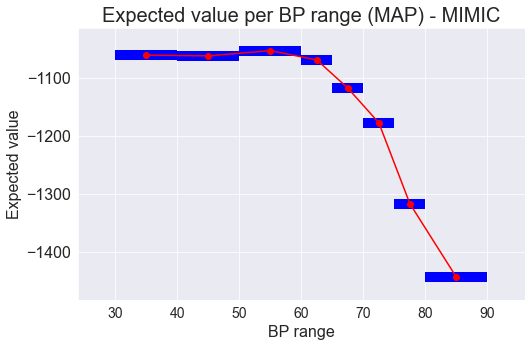

([35.0, 45.0, 55.0, 62.5, 67.5, 72.5, 77.5, 85.0],
 [-1061.3742372924341,
  -1062.637944969525,
  -1053.6694458429965,
  -1069.7062316603024,
  -1118.2467205105188,
  -1177.930764724326,
  -1317.0964492845612,
  -1443.6308032840232])

In [5]:
plot_ranges(BINS,
            V_MIMIC_8_bins_no_avg.values(),
            "BP range",
            "Expected value",
            "Expected value per BP range (MAP) - MIMIC",
            "blue")

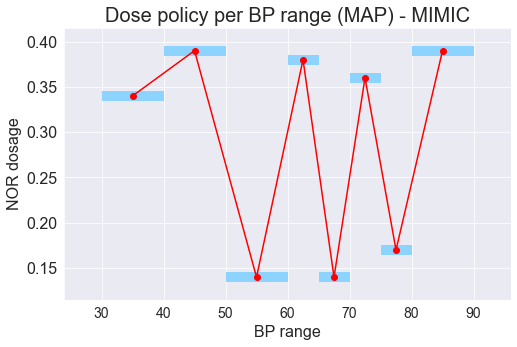

In [29]:
plot_ranges(BINS,
            policy_MIMIC_bins_no_avg.values(),
            "BP range",
            "NOR dosage",
            "Dose policy per BP range (MAP) - MIMIC",
            "#8cd3ff")

# eICU

In [8]:
policy_eICU = None
with open('../rnl/artifacts/policy_eICU_full.pkl', 'rb') as f:
    policy_eICU = pickle.load(f)
V_eICU = None
with open('../rnl/artifacts/V_eICU_full.pkl', 'rb') as f:
    V_eICU = pickle.load(f)

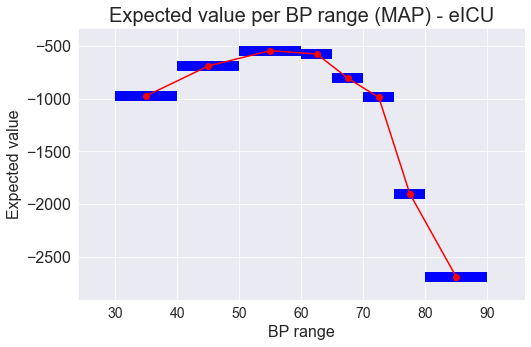

([35.0, 45.0, 55.0, 62.5, 67.5, 72.5, 77.5, 85.0],
 [-972.8833506983613,
  -690.0281271627227,
  -545.0800921197333,
  -577.3983576230527,
  -806.3871269659006,
  -989.1362121564498,
  -1902.5176611135926,
  -2692.5513457922066])

In [9]:
plot_ranges(BINS,
            V_eICU.values(),
            "BP range",
            "Expected value",
            "Expected value per BP range (MAP) - eICU",
            "blue")

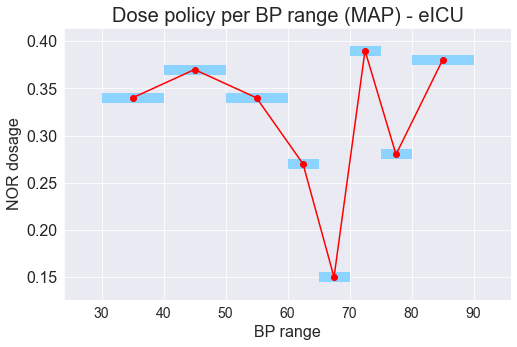

In [19]:
plot_ranges(BINS,
            policy_eICU.values(),
            "BP range",
            "NOR dosage",
            "Dose policy per BP range (MAP) - eICU",
            "#8cd3ff")